In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Persiapan Dataset

In [24]:
# Membaca file CSV
df = pd.read_csv('combined_article_dataset.csv')

In [25]:
# Lihat 5 Data teratas
print(df['title'].head(5))

0    9 Makanan Sehat untuk Lansia, Lebih Bergizi da...
1    8 Gerakan Senam Osteoporosis untuk Lansia (Mud...
2    7 Camilan Sehat yang Cocok Dikonsumsi oleh Lansia
3    Penyebab dan Cara Mengatasi Diare pada Lansia ...
4    Mengenal Sindrom Geriatri pada Lansia & Penang...
Name: title, dtype: object


# Preprocessing Data

In [8]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.9 MB/s eta 0:00:00


In [10]:
# Preprocessing Data Training
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)


True

In [26]:
data_duplikat = df.duplicated().sum()
print(data_duplikat)

500


In [27]:
# Hapus Data Duplikat
df  = df.drop_duplicates()
data_duplikat1 = df.duplicated().sum()

print(data_duplikat1)

0


In [89]:
print(df['title'][231])

Stroke pada Lansia, Kenali Penyebab serta Gejala Kondisi Medis Darurat Ini


### Case Folding

In [28]:
# Ubah ke lowercase
df['case_folding'] = df['title'].apply(lambda x: x.lower())

In [29]:
print(df['case_folding'].head())

0    9 makanan sehat untuk lansia, lebih bergizi da...
1    8 gerakan senam osteoporosis untuk lansia (mud...
2    7 camilan sehat yang cocok dikonsumsi oleh lansia
3    penyebab dan cara mengatasi diare pada lansia ...
4    mengenal sindrom geriatri pada lansia & penang...
Name: case_folding, dtype: object


### Number Removal


In [30]:
df['num_remover'] = df['case_folding'].apply(lambda x: re.sub(r'\d+', '', x))

In [31]:
print(df['num_remover'].head(5))

0     makanan sehat untuk lansia, lebih bergizi dan...
1     gerakan senam osteoporosis untuk lansia (muda...
2      camilan sehat yang cocok dikonsumsi oleh lansia
3    penyebab dan cara mengatasi diare pada lansia ...
4    mengenal sindrom geriatri pada lansia & penang...
Name: num_remover, dtype: object


### String Punctuation (Hapus Tanda Baca)

In [32]:
import string
df['string_punc'] = df['num_remover'].apply(lambda x: x.translate(str.maketrans("","",string.punctuation)))

In [33]:
print(df['string_punc'].head(5))

0     makanan sehat untuk lansia lebih bergizi dan ...
1     gerakan senam osteoporosis untuk lansia mudah...
2      camilan sehat yang cocok dikonsumsi oleh lansia
3    penyebab dan cara mengatasi diare pada lansia ...
4    mengenal sindrom geriatri pada lansia  penanga...
Name: string_punc, dtype: object


### Hilangkan Kata "lansia"

In [34]:
df['lansia_removal'] = df['string_punc'].apply(lambda x: x.replace('lansia', ''))

In [35]:
print(df['lansia_removal'].head(5))

0          makanan sehat untuk  lebih bergizi dan enak
1     gerakan senam osteoporosis untuk  mudah dan e...
2            camilan sehat yang cocok dikonsumsi oleh 
3    penyebab dan cara mengatasi diare pada  alami ...
4       mengenal sindrom geriatri pada   penanganannya
Name: lansia_removal, dtype: object


### Whitespace Removing

In [36]:
df['whitespace_remove'] = df['lansia_removal'].apply(lambda x: x.strip())

In [37]:
print(df['whitespace_remove'].head(5))

0          makanan sehat untuk  lebih bergizi dan enak
1    gerakan senam osteoporosis untuk  mudah dan ef...
2             camilan sehat yang cocok dikonsumsi oleh
3    penyebab dan cara mengatasi diare pada  alami ...
4       mengenal sindrom geriatri pada   penanganannya
Name: whitespace_remove, dtype: object


### Stopword Removal

In [38]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
stopword_remover = factory.create_stop_word_remover()
df['stopword_removal'] = df['whitespace_remove'].apply(lambda x: stopword_remover.remove(x))

In [39]:
print(df['stopword_removal'].head(5))

0             makanan sehat  lebih bergizi enak
1     gerakan senam osteoporosis  mudah efektif
2                camilan sehat cocok dikonsumsi
3    penyebab cara mengatasi diare  alami medis
4     mengenal sindrom geriatri   penanganannya
Name: stopword_removal, dtype: object


### Stemming

In [40]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['stemming'] = df['stopword_removal'].apply(lambda x: stemmer.stem(x))

In [41]:
print(df['stemming'].head(5))

0              makan sehat lebih gizi enak
1    gera senam osteoporosis mudah efektif
2               camil sehat cocok konsumsi
3        sebab cara atas diare alami medis
4            kenal sindrom geriatri tangan
Name: stemming, dtype: object


In [42]:
clean_data = df['stemming']

In [43]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split


# Langkah 1: Persiapan Dataset
# Mengambil kolom input judul artikel
judul_artikel = clean_data.tolist()


In [44]:
# Langkah 2: Tokenisasi dan Encoding

# Inisialisasi objek Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(judul_artikel)

# Ubah judul artikel menjadi urutan angka
sequences = tokenizer.texts_to_sequences(judul_artikel)

In [45]:
print(sequences)

[[70, 19, 59, 360, 646], [361, 249, 327, 250, 182], [898, 19, 647, 251], [8, 7, 13, 899, 60, 278], [11, 252, 253, 141], [900, 110, 509, 901, 902, 362, 250, 328], [183, 184, 648, 363, 57, 426, 48], [65, 649, 329, 75, 19], [903, 12, 142, 254, 16, 427], [11, 16, 650, 904], [183, 123, 58], [428, 6, 8, 55, 49], [8, 7, 13, 364, 651, 70], [652, 6, 8, 55], [11, 905, 16, 429, 143, 653], [101, 47, 85, 153], [16, 76, 154, 430], [17, 12, 654, 279], [37, 365, 77, 49, 185, 510, 7], [906, 164, 255, 21, 102, 155, 78, 256, 19], [61, 70, 79, 251, 15, 102], [51, 251, 366, 655, 184, 907], [80, 19, 165, 50, 15, 102, 78, 16], [219, 908, 58], [186, 656, 257, 59, 166], [909, 910, 7, 220, 49, 256, 258], [58, 280, 367, 657], [7, 186, 511, 75, 19, 911], [912, 101, 367, 86, 368], [658, 659, 660, 17, 111, 21], [913, 656, 112, 367, 19, 221], [101, 369, 129, 19, 330], [37, 1, 7, 49, 156], [55, 16, 661, 278, 48, 60], [662, 663, 37, 144, 222], [65, 145, 914, 915, 76, 81], [81, 2, 664, 426], [58, 916, 512, 183, 370, 59

In [46]:
# Langkah 3: Padding

# Tentukan panjang maksimum urutan
max_length = max([len(seq) for seq in sequences])
# Padding urutan agar memiliki panjang yang sama
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [47]:
print(padded_sequences)

[[  70   19   59 ...    0    0    0]
 [ 361  249  327 ...    0    0    0]
 [ 898   19  647 ...    0    0    0]
 ...
 [  17 1707 1708 ...    0    0    0]
 [   1    5   83 ...    0    0    0]
 [  12   71  246 ...    0    0    0]]


In [48]:
#Split data
padded_sequences_train, padded_sequences_test= train_test_split(padded_sequences, train_size=0.8, random_state=42)


In [49]:
print(padded_sequences_train.shape)

(984, 14)


In [50]:
print(padded_sequences_test.shape)

(247, 14)


In [51]:
# Langkah 4: Pembuatan Model

# Inisialisasi model TensorFlow Sequential
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(judul_artikel), activation='softmax')
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
# Langkah 5: Pelatihan Model

# Persiapan data training
labels = list(range(len(judul_artikel)))  # Label adalah indeks judul artikel
print(labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [53]:
# Konversi data menjadi array NumPy
padded_sequences = np.array(padded_sequences)
labels = np.array(labels)
print(labels)

[   0    1    2 ... 1228 1229 1230]


In [54]:
#Split labels
labels_train, labels_test= train_test_split(labels, train_size=0.8, random_state=42)

In [55]:
print(labels_train)

[1069  898  425 1227  811  259  538  770  722  308   59  979  736 1010
  864  482  461  422  352  464  752  332   83  129 1037  465  948  467
  260  812  572  926  584  138  974  141  868 1142  405  139  390  885
  224  936  274  409  731  832  394  599 1087  701  914 1018  890  398
  497  621  331  668  887  721   39   30  242  762  136  310 1027  527
 1145    3  506  649 1063 1061  865  781 1093  314 1218  319  997  439
    5  100  671  534  513  872  462  723 1004  227  839  552  672 1208
   66   67  435  211   12  533 1000  299  618  964 1176 1057  735 1167
  380 1133  493 1149  597  490  273  427  362  237 1039    2    6  451
  311 1058  381 1147 1077  215  411   27 1187 1120  594  823  893 1119
  772  983  354 1079  442  256  291   25  336  430   47  318  106  845
   55  783  213  120  593  535  548   72  838  787  596  545  944 1198
  582 1144  583  529  325 1102  977  316  651 1007 1097  720 1053 1013
 1103   60  759   92  908  990  351  987  280 1224  768  359  679 1099
  881 

In [56]:
print(labels_test)

[ 549 1050  244  553 1165  907  732  526  101  128  420  978  210 1052
  980  415  665  365  900  328  532  323 1029 1140  265  985  803 1168
   49   43  192  876  113  355  695  605  578  107  989  155  906  712
  432  982  168  233  615  922  327  912  764  992  306   44  290 1180
   63  344  869  715 1222  617  923  780  778  767  874 1080   76 1067
  933  991   78  700 1121  494 1002  243 1081  542  884  753   70  543
   23  808  968   58  628  949  643 1175   81  371 1036  174  303  807
  523 1132  661  170 1032  670   51  678  660  591  963  901  123  209
 1219   54  602  363  718   56   86  514  834  109  551 1193 1192  573
  937  423  785  570  609 1194  428  429  814  424 1196  541  558  708
  875  377  294  846 1199  704  626  946  438  286  855  413  962  654
  727 1124  382  410 1153   10  147  859 1022  453 1161 1221  567  730
  765  728  270  275 1105  629  277  613  135  208  220 1223 1217  486
  158  140  198  292  196 1131  247  519  917  737  971  296  447  358
  650 

In [57]:
# Pelatihan model
# model.fit(padded_sequences, labels, epochs=50)
history = model.fit(padded_sequences_train, 
                    labels_train, epochs=100, batch_size = 50)

Epoch 1/100
20/20 [==============================] - 1s 9ms/step - loss: 7.1196 - accuracy: 0.0000e+00
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 7.1101 - accuracy: 0.0041
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 7.1000 - accuracy: 0.0010
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 7.0758 - accuracy: 0.0010
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 7.0227 - accuracy: 0.0010
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 6.9526 - accuracy: 0.0000e+00
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 6.8983 - accuracy: 0.0010
Epoch 8/100
20/20 [==============================] - 0s 7ms/step - loss: 6.8550 - accuracy: 0.0010
Epoch 9/100
20/20 [==============================] - 0s 7ms/step - loss: 6.8074 - accuracy: 0.0020
Epoch 10/100
20/20 [==============================] - 0s 6ms/step - loss: 6.7482 - accuracy: 0.0041
E

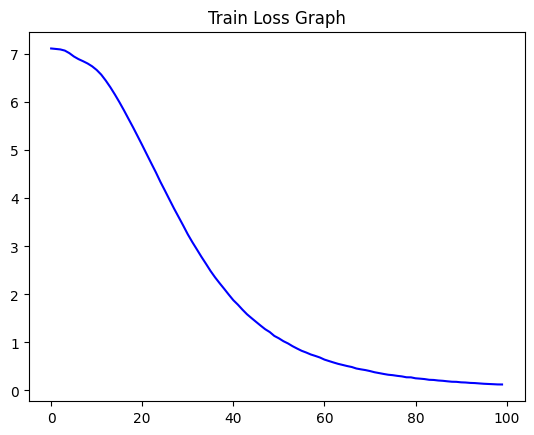

In [58]:
# summarize history for loss
import matplotlib.pyplot as plt

# plt.plot(history.history['val_loss'], color='r', label='Val Loss')
plt.plot(history.history['loss'], color='b', label='Train Loss')
plt.title('Train Loss Graph')
plt.show()

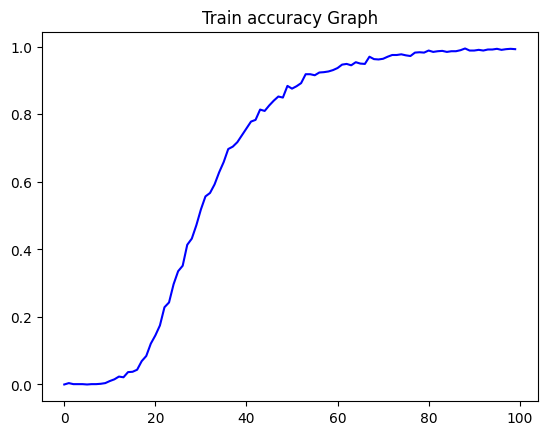

In [59]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='b', label='Train accuracy')
# plt.plot(history.history['val_accuracy'], color='r', label='Val accuracy')
plt.title('Train accuracy Graph')
plt.show()

In [78]:
# Langkah 6: Prediksi dan Rekomendasi

# Judul artikel input 
judul_input = ["kenal spinal cord injury sebab gejala tangan"]

# Ubah judul input menjadi urutan angka
input_sequence = tokenizer.texts_to_sequences(judul_input)
input_padded = pad_sequences(input_sequence, maxlen=max_length, padding='post')

# Dapatkan representasi vektor dari judul input
input_vector = model.predict(input_padded)

# Hitung kesamaan kosinus antara vektor input dan vektor artikel dalam dataset
similarities = []
for article_vector in model.predict(padded_sequences):
    similarity = cosine_similarity(input_vector, article_vector.reshape(1, -1))
    similarities.append(similarity[0][0])

# Urutkan indeks artikel berdasarkan kesamaan kosinus (peringkat paling mirip)
ranked_indices = np.argsort(similarities)[::-1]

# # Tampilkan peringkat artikel paling mirip
# i = 0
# for index in ranked_indices:
#     print(judul_artikel[index])
#     i += 1
#     if i >= 10:
#       break
# print(judul_artikel[338])
i = 0
for index, id_data in enumerate(ranked_indices):
    print("id_data Artikel:", id_data)
    print(judul_artikel[id_data])
    print()
    i += 1
    if i >= 10:
      break


39/39 [==============================] - 0s 2ms/step
id_data Artikel: 338
kenal spinal cord injury sebab gejala tangan

id_data Artikel: 231
stroke kenal sebab gejala kondisi medis darurat

id_data Artikel: 731
kenal hepatitis fulminan gejala serius sebab

id_data Artikel: 1198
lionel messi alami gejala gastroenteritis flu perut sakit apa

id_data Artikel: 451
lain tulang ciri gejala sebab solusi

id_data Artikel: 194
kenal bagai gejala glaukoma bisa serang

id_data Artikel: 196
kenal sebab perut kembung

id_data Artikel: 747
kenal radang tenggorok sebab gejala hingga obat rumah

id_data Artikel: 1121
kenal insomnia gejala sebab cara atas

id_data Artikel: 1199
kenal pneumonia kondisi idap ameer azzikra tinggal



In [63]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [64]:
saved_model_path = "/content/my_model.h5"
model.save(saved_model_path)

In [65]:
!tensorflowjs_converter --input_format=keras {saved_model_path} /content/

2023-06-02 14:46:49.559503: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
